In [1]:
from knowknow import *

from __init__ import births_deaths

socdb = Dataset('sociology-wos-74b')
db = socdb

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


# population distribution of cited works (uncategorized text!)

loading variable sociology-wos-74b/ind ___ cage.fy from disk
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


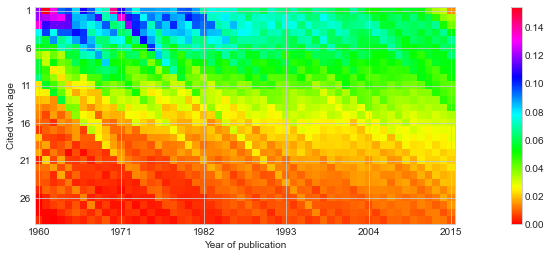

In [2]:
mat = viz.matrix(
    db, 'cits', 
    plot=True, trans=False,
    norm='fy',
    cage=range(1,30), 
    fy=range(1960,2016)
)
plt.ylabel('Cited work age');
plt.xlabel('Year of publication');
db.save_figure('cage-fy-dist')

In [3]:
mat = viz.matrix(
    db, 'cits', 
    #plot=True, trans=False,
    #norm='fy',
    cage=range(0,50), 
    fy=range(1960,2015)
)

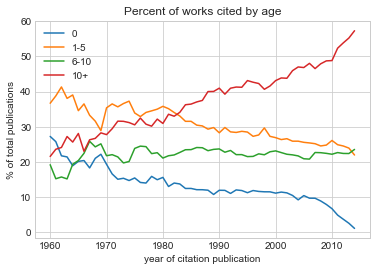

In [4]:
plt.plot( 100*mat[0,:] / mat.sum(axis=0), label='0' )
plt.plot( 100*mat[1:6,:].sum(axis=0) / mat.sum(axis=0), label='1-5' )
plt.plot( 100*mat[6:11,:].sum(axis=0) / mat.sum(axis=0), label='6-10' )
plt.plot( 100*mat[10:,:].sum(axis=0) / mat.sum(axis=0), label='10+' )
plt.title("Percent of works cited by age");
plt.xlabel("year of citation publication")
plt.ylabel("% of total publications")
plt.xticks(range(0,55,10),range(1960+0,1960+55,10))
plt.legend();

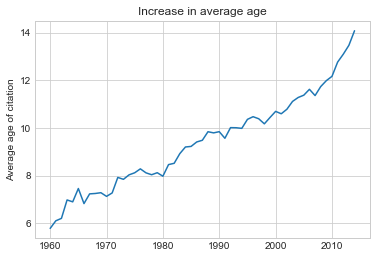

In [5]:
mm = mat.T * np.array(list(range(0,50)))
mm = mm.sum(axis=1) / mat.T.sum(axis=1)
plt.plot( mm )
plt.title("Increase in average age")
plt.ylabel("Average age of citation")
plt.xticks(range(0,55,10),range(1960+0,1960+55,10));

In [6]:
aa1, aa2 = mm[0], mm[-1]

In [7]:
pct_first = mat[0][0:20].sum() / mat[:,:20].sum()

In [8]:
pct_first2 = mat[0][-20:].sum() / mat[:,-20:].sum()

In [9]:
p15a = ( mat[1:6,:].sum(axis=0) / mat.sum(axis=0) )[10]
p15b = ( mat[1:6,:].sum(axis=0) / mat.sum(axis=0) )[-1]

In [10]:
p610a = ( mat[6:11,:].sum(axis=0) / mat.sum(axis=0) )[10]
p610b = ( mat[6:11,:].sum(axis=0) / mat.sum(axis=0) )[-1]

In [11]:
p10a = ( mat[10:,:].sum(axis=0) / mat.sum(axis=0) )[10]
p10b = ( mat[10:,:].sum(axis=0) / mat.sum(axis=0) )[-1]

In [12]:
display(Markdown("""
Sociologists mostly refer to the young, those cited works which received their first citation in the dataset recently.

{pct_first:0.0%} of references published in 1960-1980 were first-appearances and {pct_first2:0.0%} in 1995-2015.

The proportion of citations to works aged 1-5 has declined steadily from {p15a:0.0%} in 1970 to {p15b:0.0%} in 2015.
    In this same time-period, citations to works aged 6-10 has remained steady, near {p610a:0.0%}.
And perhaps the most dramatic trend, the citations to older works (at least 10 years of academic age in this context) have taken over,
    rising from {p10a:0.0%} (1970) to {p10b:0.0%} (2015) of all citations.
    
Correspondingly, the average age of cited works has risen almost linearly from {aa1:.2f} to {aa2:.2f} from 1960 to 2015.

""".format(**locals())))


Sociologists mostly refer to the young, those cited works which received their first citation in the dataset recently.

17% of references published in 1960-1980 were first-appearances and 8% in 1995-2015.

The proportion of citations to works aged 1-5 has declined steadily from 35% in 1970 to 22% in 2015.
    In this same time-period, citations to works aged 6-10 has remained steady, near 22%.
And perhaps the most dramatic trend, the citations to older works (at least 10 years of academic age in this context) have taken over,
    rising from 28% (1970) to 57% (2015) of all citations.
    
Correspondingly, the average age of cited works has risen almost linearly from 5.78 to 14.08 from 1960 to 2015.



In [13]:
display(Markdown("""
Compared both to writing authors and cited authors, 
    the distribution for cited works is aging more slowly. 
""".format(**locals())))


Compared both to writing authors and cited authors, 
    the distribution for cited works is aging more slowly. 


In [14]:
display(Markdown("""
Only 6% of works cited 2010-2015 have been cited for at least 30 years, 
    compared to 16% of writing authors, 
    and 12% of cited authors.
""".format(**locals())))


Only 6% of works cited 2010-2015 have been cited for at least 30 years, 
    compared to 16% of writing authors, 
    and 12% of cited authors.


# citing author

## First authors that don't publish for a decade (needs incorporated)

In [15]:
authors_by_year = db.by('ffa','fy').docs

loading variable sociology-wos-74b/doc ___ ffa.fy from disk


In [16]:
authors = db.items('ffa')

loading variable sociology-wos-74b/ind ___ ffa from disk


In [17]:
tot=defaultdict(int);cnt=defaultdict(int)
for a in authors:
    try:
        first = min(YY for YY in range(1900, 2020) if (a, YY) in authors_by_year and authors_by_year[(a,YY)]>0)
    except:
        #print(a)
        continue
    if first >= 2005:
        continue
    publishes_again_within_decade = any( ((a,YY) in authors_by_year and authors_by_year[(a,YY)]>0) for YY in range(first+1, first+10+1) )
    
    #print(a, first, publishes_again_within_decade)
    #print(db.trend('ffa', a).docs(first,first+10))
    
    if publishes_again_within_decade:
        cnt[first] += 1
    tot[first] += 1

In [18]:
A = np.array([cnt[YY] for YY in range(1940,2005)])
B = np.array([tot[YY] for YY in range(1940,2005)])

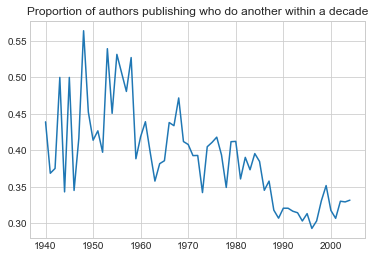

In [19]:
plt.plot(A/B)
plt.title("Proportion of authors publishing who do another within a decade")
plt.xticks(range(0,62,10),range(1940,2007,10));

In [20]:
num1 = sum(cnt[YY] for YY in range(1950,1955)) / sum(tot[YY] for YY in range(1950,1955))
num2 = sum(cnt[YY] for YY in range(2000,2005)) / sum(tot[YY] for YY in range(2000,2005))
print(num1, num2)

0.4475920679886686 0.3227794900532362


In [21]:
#The proportion of authors who only publish once in this dataset has increased dramatically from 1960-1965 (26% of writing authors) to 2010-2015 (43% of writing authors). 
#This is likely a feature of the broad transition to more collaboration in Sociology (Wuchty, Jones, Uzzi 2007; Leahey and Moody 2014; Leahey et al. 2008).
display(Markdown("""
There has been some decrease in the last 70 years in the retention rate of writing authors within this dataset.
    Of first authors who published for the first time in 1950-1955, {num1:.0%} would publish as first authors again within ten years.
    This statistic has experienced steady decline in the subsequent 50 years.
    Of first authors publishing for the first time in 2000-2005, {num2:.0%} would publish as first authors again within ten years.
""".format(**locals())))


There has been some decrease in the last 70 years in the retention rate of writing authors within this dataset.
    Of first authors who published for the first time in 1950-1955, 45% would publish as first authors again within ten years.
    This statistic has experienced steady decline in the subsequent 50 years.
    Of first authors publishing for the first time in 2000-2005, 32% would publish as first authors again within ten years.


## first authors that don't publish again (at any authorship) for 10yrs (needs incorporated)

In [22]:
fauthors_by_year = db.by('ffa','fy').docs
authors_by_year = db.by('fa','fy').docs

loading variable sociology-wos-74b/doc ___ fa.fy from disk


In [23]:
authors = db.items('ffa')

In [24]:
tot=defaultdict(int);cnt=defaultdict(int)
for a in authors:
    try:
        first = min(YY for YY in range(1900, 2020) if (a, YY) in fauthors_by_year and fauthors_by_year[(a,YY)]>0)
    except:
        #print(a)
        continue
    if first >= 2005:
        continue
        
    publishes_again_within_decade = any( ((a,YY) in authors_by_year and authors_by_year[(a,YY)]>0) for YY in range(first+1, first+10+1) )
    
    #print(a, first, publishes_again_within_decade)
    #print(db.trend('ffa', a).docs(first,first+10))
    
    if publishes_again_within_decade:
        cnt[first] += 1
    tot[first] += 1

In [25]:
A = np.array([cnt[YY] for YY in range(1940,2005)])
B = np.array([tot[YY] for YY in range(1940,2005)])

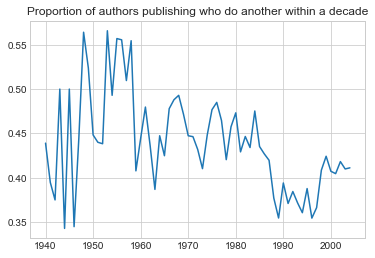

In [26]:
plt.plot(A/B)
plt.title("Proportion of authors publishing who do another within a decade")
plt.xticks(range(0,62,10),range(1940,2007,10));

In [97]:
num1 = sum(cnt[YY] for YY in range(1950,1956)) / sum(tot[YY] for YY in range(1950,1956))

nums = [
    sum(cnt[YY] for YY in range(YYY,YYY+5+1)) / sum(tot[YY] for YY in range(YYY,YYY+5+1))
    for YYY in range(1950,2005,5)
]

minY = nums.index(min(nums))*5 + 1950
minN = min(nums)

num2 = sum(cnt[YY] for YY in range(2000,2005)) / sum(tot[YY] for YY in range(2000,2005))
print(num1, num2)

0.4930555555555556 0.41019893527598766


In [99]:
#The proportion of authors who only publish once in this dataset has increased dramatically from 1960-1965 (26% of writing authors) to 2010-2015 (43% of writing authors). 
#This is likely a feature of the broad transition to more collaboration in Sociology (Wuchty, Jones, Uzzi 2007; Leahey and Moody 2014; Leahey et al. 2008).
display(Markdown("""
Of authors who published for the first time in 1950-1955, {num1:.0%} would publish again within ten years.
    This statistic has experienced some variation in the subsequent 50 years, dropping as low as {minN:.0%} in {minY}, and returning back to {num2:.0%} in 2000-2005.
""".format(**locals())))


Of authors who published for the first time in 1950-1955, 49% would publish again within ten years.
    This statistic has experienced some variation in the subsequent 50 years, dropping as low as 38% in 1990, and returning back to 41% in 2000-2005.


## first citing author

loading variable sociology-wos-74b/ind ___ ffaAge.fy from disk
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


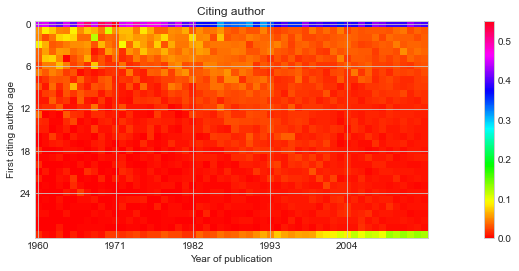

In [29]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    norm='fy',
    includeComplement=True,
    ffaAge=range(0,30), 
    fy=range(1960,2015)
)

plt.title('Citing author');
plt.xlabel("Year of publication")
plt.ylabel("First citing author age")
db.save_figure('ffaage-fy-dist')

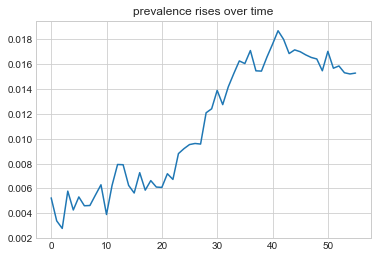

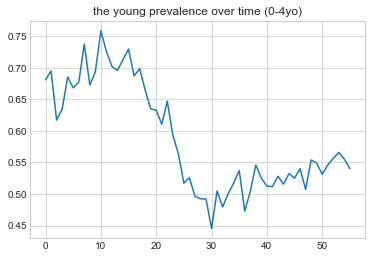

In [30]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    norm='fy',
    includeComplement=True,
    ffaAge=range(0,30), 
    fy=range(1960,2015)
)
plt.title('prevalence rises over time')
plt.plot(mat[15:,0:].mean(axis=0))
plt.show()

plt.plot(mat[0:5,:].sum(axis=0))
plt.title('the young prevalence over time (0-4yo)')
plt.show();

In [31]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    norm='fy',
    ffaAge=range(1,30), 
    fy=range(1960,2020)
)

In [32]:
n1 = mat[14:,0:20].mean(axis=0).mean()
n2 = mat[14:,].mean(axis=0).max()
y = mat[14:,].mean(axis=0).argmax() + 1960
y2 = mat.shape[1]+1960 - 1
n3 = mat[14:,].mean(axis=0)[-1]

In [33]:
display(Markdown("""
In years before 1980, only {n1:0.2%} of publishing authors each year had published for at least 15 years.
In 1980 began a steady rise to a maximum prevalence of {n2:0.1%} in {y},
    and a subsequent drop to {n3:0.1%} in {y2}.
""".format(**locals())))


In years before 1980, only 0.95% of publishing authors each year had published for at least 15 years.
In 1980 began a steady rise to a maximum prevalence of 2.7% in 2001,
    and a subsequent drop to 1.7% in 2019.


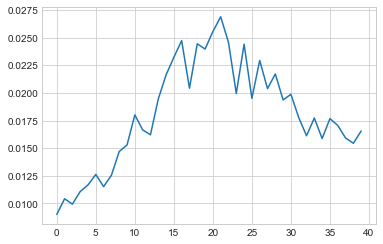

In [34]:
plt.plot(mat[15:,20:].mean(axis=0))

In [35]:
mat[0][-1]

0.05887870390108719

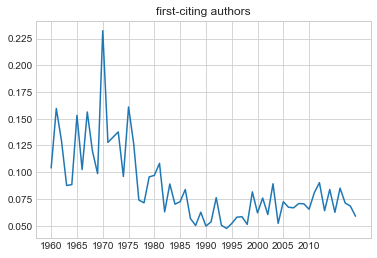

In [36]:
plt.plot(mat[0])
plt.title("first-citing authors")
plt.xticks(
    range(0,55,5),
    range(1960,2015,5)
);

## any citing author

loading variable sociology-wos-74b/ind ___ faAge.fy from disk


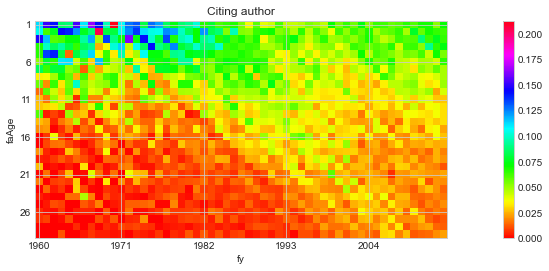

In [37]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    norm='fy',
    includeComplement=False,
    faAge=range(1,30), 
    fy=range(1960,2015)
)

plt.title('Citing author');

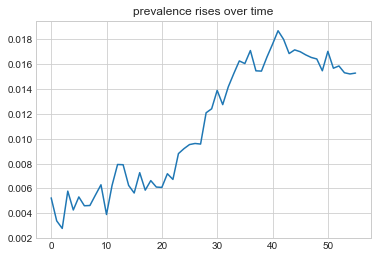

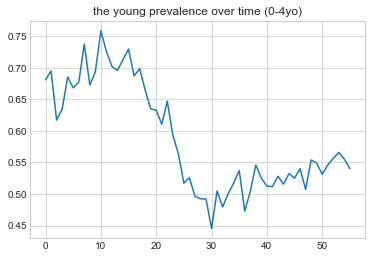

In [38]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    norm='fy',
    includeComplement=True,
    ffaAge=range(0,30), 
    fy=range(1960,2015)
)
plt.title('prevalence rises over time')
plt.plot(mat[15:,0:].mean(axis=0))
plt.show()

plt.plot(mat[0:5,:].sum(axis=0))
plt.title('the young prevalence over time (0-4yo)')
plt.show();

In [39]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    norm='fy',
    faAge=range(1,30), 
    fy=range(1960,2020)
)

In [40]:
n1 = mat[14:,0:20].mean(axis=0).mean()
n2 = mat[14:,].mean(axis=0).max()
y = mat[14:,].mean(axis=0).argmax() + 1960
y2 = mat.shape[1]+1960 - 1
n3 = mat[14:,].mean(axis=0)[-1]

In [41]:
display(Markdown("""
In years before 1980, only {n1:0.2%} of publishing authors (not just first authors) each year had published for at least 15 years.
In 1980 began a steady rise to a maximum prevalence of {n2:0.1%} in {y},
    and a subsequent drop to {n3:0.1%} in {y2}.
""".format(**locals())))


In years before 1980, only 0.98% of publishing authors (not just first authors) each year had published for at least 15 years.
In 1980 began a steady rise to a maximum prevalence of 2.9% in 2001,
    and a subsequent drop to 2.0% in 2019.


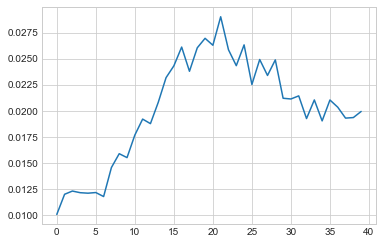

In [42]:
plt.plot(mat[15:,20:].mean(axis=0))

In [43]:
mat[0][-1]

0.05147475275563107

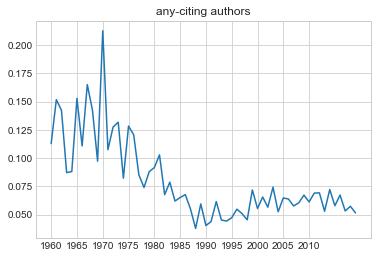

In [44]:
plt.plot(mat[0])
plt.title("any-citing authors")
plt.xticks(
    range(0,55,5),
    range(1960,2015,5)
);

# cited works

loading variable sociology-wos-74b/ind ___ cAge.fy from disk


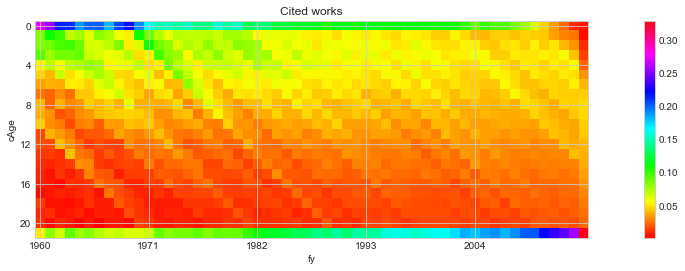

In [45]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    norm='fy',
    cAge=range(0,21), 
    includeComplement=True,
    fy=range(1960,2015)
)

plt.title('Cited works');

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


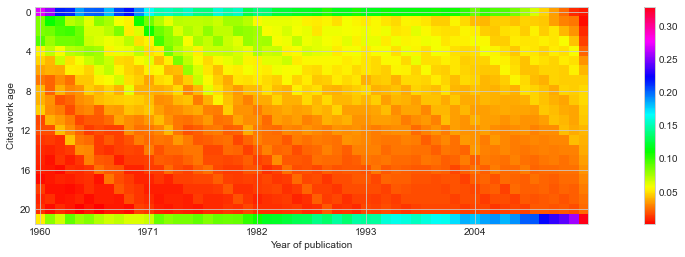

In [46]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    norm='fy',
    cAge=range(0,21), 
    includeComplement=True,
    fy=range(1960,2015)
)

plt.ylabel('Cited work age');
plt.xlabel("Year of publication")
db.save_figure('cage-fy-dist')

In [47]:
mat = viz.matrix(
    socdb, 'cits', 
    trans=False,
    norm='fy',
    cAge=range(0,31), 
    includeComplement=True,
    fy=range(1960,2015)
)

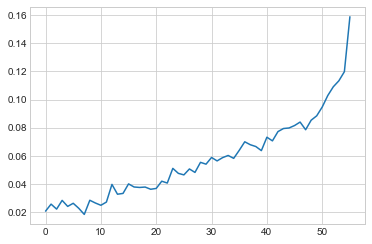

In [48]:
plt.plot(mat[-1])

In [49]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    norm='fy',
    includeComplement=True,
    cAge=range(0,100), 
    fy=range(1960,2015)
)

In [50]:
cohort = 1960

In [51]:
mat[cohort-1960][0]

0.27222938144329895

In [52]:
mat[cohort+1-1960][1]

0.11017153901908673

In [53]:
mat[cohort+1-1960][1]

0.11017153901908673

In [54]:
mat.shape[1]

56

In [55]:
mat.shape

(101, 56)

In [56]:
cohorts = []
for cohort in range(1960,1990):
    diffs = []
    for age in range(0,30):
        if cohort+age-1960 >= mat.shape[1]-1:
            continue
            
        diffs.append( mat[age][cohort+age-1960] / mat[age,:].mean() )
                     
    cohorts.append(np.array(diffs).mean())

Text(0.5, 0, 'cohorts')

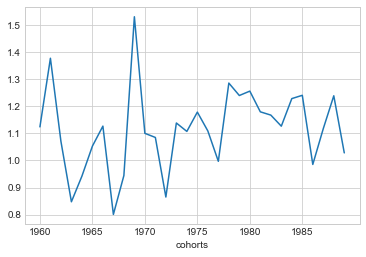

In [57]:
plt.plot(cohorts)
plt.xticks(
    range(0,30,5),
    range(1960,1990,5)
);
plt.xlabel('cohorts')

In [58]:
1 - cohorts[1967-1960]

0.19926574524129115

In [59]:
cohorts[1978-1960]

1.2855968121529149

In [60]:
cohorts[1969-1960]

1.5304369415458692

In [61]:
1 - cohorts[1968-1960]

0.05579394619150335

In [62]:
cohorts[1970-1960]

1.1000481624739789

In [63]:
cohorts[1971-1960]

1.0848592062886169

In [64]:
cohorts

[1.1238691579944047,
 1.3772410521457519,
 1.0707976332463824,
 0.847413913225923,
 0.9418724681460452,
 1.0527257321665515,
 1.1266905522948847,
 0.8007342547587089,
 0.9442060538084966,
 1.5304369415458692,
 1.1000481624739789,
 1.0848592062886169,
 0.8649193045226475,
 1.1382228167825112,
 1.1071281301546927,
 1.178445931176222,
 1.1087787101388307,
 0.9967833277999671,
 1.2855968121529149,
 1.2396685173310849,
 1.255886549302115,
 1.1794613578882032,
 1.1673771766633114,
 1.1264734345436838,
 1.22826483886017,
 1.2404263189978477,
 0.9852297698577729,
 1.1175042880614574,
 1.2386742361565448,
 1.0278700199218327]

In [65]:
ysort = sorted(range(len(cohorts)), key=lambda x:-cohorts[x])
ysort = [x+1960 for x in ysort]

In [66]:
cohorts[1978-1960]

1.2855968121529149

In [67]:
max(cohorts)

1.5304369415458692

In [68]:
n1 = cohorts[1969-1960] - 1
n2 = 1 - cohorts[1968-1960]
ymax2 = ysort[1]
n3 = cohorts[ymax2-1960] - 1
ymin1 = ysort[-1]
n4 = 1 - cohorts[ymin1-1960]

In [69]:
display(Markdown("""
It also seems that specific cohorts have outsized representation in these age distributions. 
Papers first cited in 1969 had on average a {n1:0.0%} higher representation in their age pools as other cohorts. 
By comparison, 1968 was represented {n2:0.0%} less than the average cohort. 
A similar peak happens again in {ymax2} (+{n3:0.0%}). 
The lowest trough was {ymin1} (-{n4:0.0%}).
""".format(**locals())))


It also seems that specific cohorts have outsized representation in these age distributions. 
Papers first cited in 1969 had on average a 53% higher representation in their age pools as other cohorts. 
By comparison, 1968 was represented 6% less than the average cohort. 
A similar peak happens again in 1961 (+38%). 
The lowest trough was 1967 (-20%).


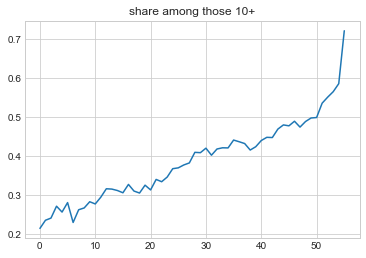

In [70]:
plt.plot(mat[10:].sum(axis=0))
plt.title('share among those 10+');

In [71]:
mat.shape

(101, 56)

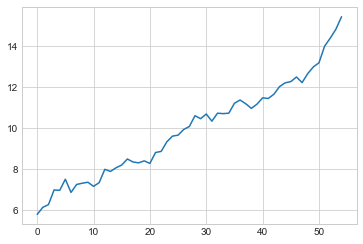

In [72]:
# note that I'm trimming the matrix here to account for the *excluded* row...
ave_age = (np.indices((100,2015-1960))[0] * mat[:100,:mat.shape[1]-1]).sum(axis=0) / mat.sum(axis=0)[:mat.shape[1]-1]
plt.plot( ave_age )

In [73]:
n1 = ave_age[0]
n2 = ave_age[2010-1960]

In [74]:
display(Markdown("""
The average age of cited works has risen from {n1:0.1f} years old in 1960 to {n2:0.1f} years old in 2010.
""".format(**locals())))


The average age of cited works has risen from 5.8 years old in 1960 to 13.2 years old in 2010.


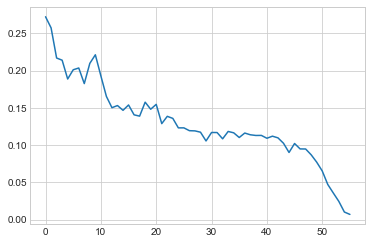

In [75]:
plt.plot(mat[0])

In [76]:
n1 = mat[0][0]
y1 = 1960
n2 = mat[0][0-1960+2010]
y2 = 2010

In [77]:
display(Markdown("""
The proportion of citations which reference never-before-cited works has been steadily declining 
    from {n1:0.0%} in {y1} 
    to {n2:0.0%} in {y2}. 
This may well be a feature of this dataset, 
    as I’ve only included cited works which eventually accumulate at least 5 citations. 
Recently published papers are less likely to have made that bar than older papers.
""".format(**locals())))


The proportion of citations which reference never-before-cited works has been steadily declining 
    from 27% in 1960 
    to 7% in 2010. 
This may well be a feature of this dataset, 
    as I’ve only included cited works which eventually accumulate at least 5 citations. 
Recently published papers are less likely to have made that bar than older papers.


In [78]:
mat = viz.matrix(
    socdb, 'cits',
    includeComplement=True, 
    plot=False, trans=False,
    norm='fy',
    cAge=range(0,30), 
    fy=range(1960,2015)
)

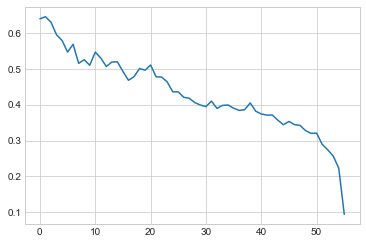

In [79]:
plt.plot(mat[0:6].sum(axis=0))

In [80]:
n1 = mat[0:6,0:10].sum(axis=0).mean()
n2 = mat[0:6,10:20].sum(axis=0).mean()
n3 = mat[0:6,20:30].sum(axis=0).mean()
n4 = mat[0:6,30:40].sum(axis=0).mean()
n5 = mat[0:6,40:50].sum(axis=0).mean()

In [81]:
display(Markdown("""
But even if we look at cited works ages 0-5 (inclusive), the statistics are dramatic.
{n1:0.0%} of citations were to works ages 0-5 in an average year in the 1960s.
It dropped to {n2:0.0%} in the 1970s,
    {n3:0.0%} in the 1980s,
    {n4:0.0%} in the 1990s,
    and {n5:0.0%} in the 2000s.
""".format(**locals())))


But even if we look at cited works ages 0-5 (inclusive), the statistics are dramatic.
57% of citations were to works ages 0-5 in an average year in the 1960s.
It dropped to 51% in the 1970s,
    44% in the 1980s,
    39% in the 1990s,
    and 35% in the 2000s.


# from author to work

+ There is little visible difference by age of the cited work.
+ Possibly an increase across the board for 2-6 cAge
+ Very high for first-cited papers
+ Very low for old papers
+ The diagonal line shows propensity to cite from your first year of publication (same academic age).
+ Older authors more often citing works for the first time

loading variable sociology-wos-74b/ind ___ cAge.ffaage from disk


''

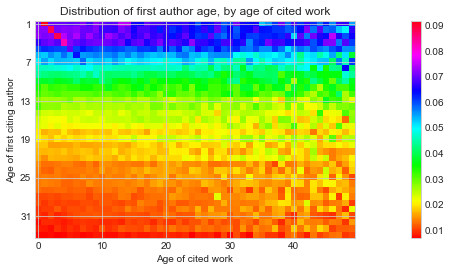

In [82]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=True,
    cAge=range(0,50), 
    ffaage=range(1,35),
    #includeComplement=True, 
    norm='cAge'
)
plt.xlabel("Age of cited work")
plt.ylabel("Age of first citing author")
plt.title("Distribution of first author age, by age of cited work")
;

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


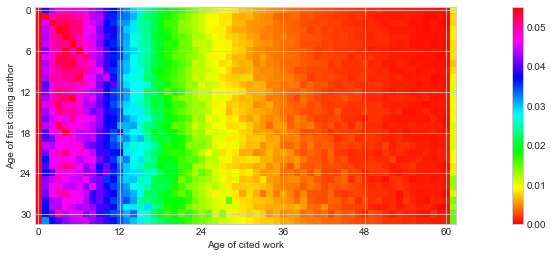

In [166]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=True,
    cAge=range(0,61), 
    ffaage=range(0,31),
    includeComplement=True, 
    norm='ffaage'
)
plt.clim(0,0.055)
plt.xlabel("Age of cited work")
plt.ylabel("Age of first citing author")
#plt.title("Distribution of cited work age, by age of first citing author")
;
db.save_figure('age-ffa-age-c')

In [84]:
mat = viz.matrix(
    socdb, 'cits', 
    trans=True,
    cAge=range(0,101), 
    ffaage=range(0,81),
    includeComplement=True,
    norm='ffaage'
)

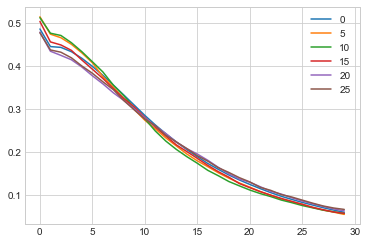

In [85]:
for AGE in [0,5,10,15,20,25]:
    plt.plot( [ mat[AGE,i:i+10].sum() for i in range(0,30) ], label=AGE )
plt.legend();

In [86]:
sorted(-mat[2,:])[1]

-0.06133278331958299

In [87]:
mat[2,2]

0.06133278331958299

Text(0.5, 1.0, 'is self-citation prefered (second to citing new work)')

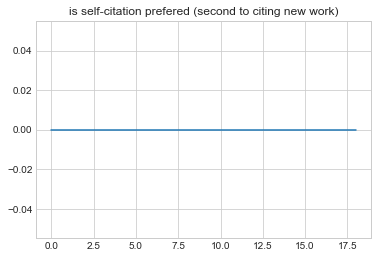

In [88]:
plt.plot([np.argsort(-mat[i,:])[0] for i in range(1,20)])
plt.title('is self-citation prefered (second to citing new work)')

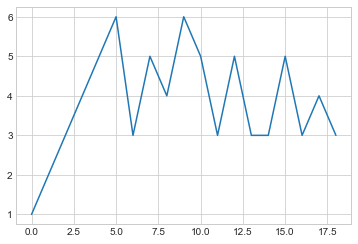

In [89]:
plt.plot([np.argsort(-mat[i,:])[1] for i in range(1,20)])

In [90]:
print(0, mat[0,0] == -sorted(-mat[0,:])[0])
for i in range(1,20):
    print(i, mat[i,i] == -sorted(-mat[i,:])[1])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False


Text(0.5, 1.0, 'is citing new work prefered')

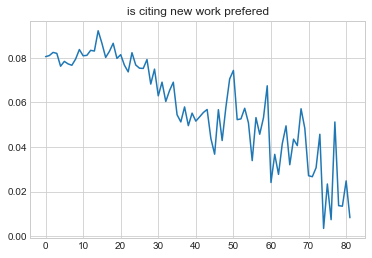

In [91]:
plt.plot(mat[:,0])
plt.title('is citing new work prefered')

In [92]:
for i in range(1,20):
    print(i, mat[i,0] == -sorted(-mat[i,:])[0], mat[i,0])

1 True 0.0809505988023952
2 True 0.08237080927023176
3 True 0.08194570219372008
4 True 0.07617473613041355
5 True 0.07834577087679305
6 True 0.07722519282638528
7 True 0.07660776325326801
8 True 0.07937536995800096
9 True 0.08365644095660535
10 True 0.08087043487257302
11 True 0.08104840282382308
12 True 0.08330184322122854
13 True 0.08298553819275939
14 True 0.09208668127587047
15 True 0.08649468892261002
16 True 0.08011935020444248
17 True 0.08284583111741417
18 True 0.08646117285244985
19 True 0.07968546839205003


In [93]:
mat[1,1]

0.05748502994011976

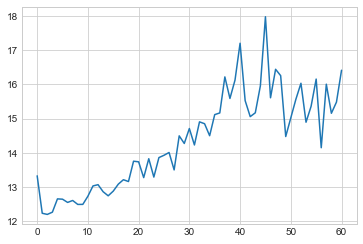

In [94]:
avg_ages = [ (mat[AGE, :] * np.arange(0,mat.shape[1],1)).sum() for AGE in range(0,61) ]
plt.plot( avg_ages )

In [95]:
matC = viz.matrix(
    socdb, 'cits', 
    trans=True,
    cAge=range(0,101), 
    ffaage=range(0,41),
    includeComplement=True
)

In [100]:
n1 = mat[0:20,0].mean()
n2 = mat[35:,0].mean()

In [101]:
n3a = avg_ages[0]
n3b = np.mean(avg_ages[1:6])
n4 = np.mean(avg_ages[15:21])

n5 = matC[40:,:].sum()
n5b = matC[40:,:].sum() / matC[:,:].sum()
n6 = np.mean(avg_ages[40:])

In [102]:
#First-time authors published {num1:0.0%} of the papers in {y1}, up from {num2:0.0%} in {y2}.
#First-time authors are an odd group, because they are predominantly made of authors who will never publish an article again. 
#{num3:0.0%} of these would not publish again.
#Among other authors

display(Markdown("""
Authors of all ages cite new work more than any other specific age.
{n1:0.0%} of citations written by authors aged 0-20 are to new works, and initiate their academic birth.
At 20 there begins a slight decrease in this percentage, to {n2:0.0%} among those aged 35+.

For young authors (< 7 years) the second most cited age is their own academic age.
Older authors will cite works with academic age 3, 4, or 5 most often.

The average age of cited works grows gradually older with the age of the citing author.
First citing authors on average cite works with academic age {n3a:0.1f}.
Those aged 1-5 on average cite works with academic age {n3b:0.1f}.
Those aged 15-20 on average cite works with academic age {n4:0.1f}.
Those aged 40+, who account for {n5b:0.1%} of the citations, on average cite works with academic age {n6:0.1f}.
""".format(**locals())))


Authors of all ages cite new work more than any other specific age.
8% of citations written by authors aged 0-20 are to new works, and initiate their academic birth.
At 20 there begins a slight decrease in this percentage, to 4% among those aged 35+.

For young authors (< 7 years) the second most cited age is their own academic age.
Older authors will cite works with academic age 3, 4, or 5 most often.

The average age of cited works grows gradually older with the age of the citing author.
First citing authors on average cite works with academic age 13.3.
Those aged 1-5 on average cite works with academic age 12.4.
Those aged 15-20 on average cite works with academic age 13.3.
Those aged 40+, who account for 4.2% of the citations, on average cite works with academic age 15.7.


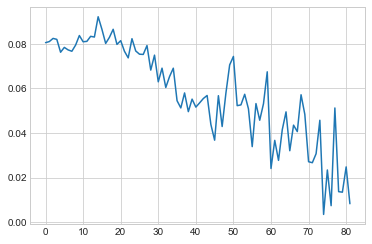

In [103]:
plt.plot(mat[:,0])

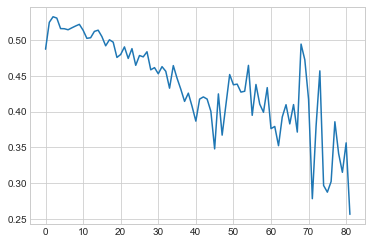

In [104]:
plt.plot(mat[:,:10].sum(axis=1))

# here we are!!!

Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


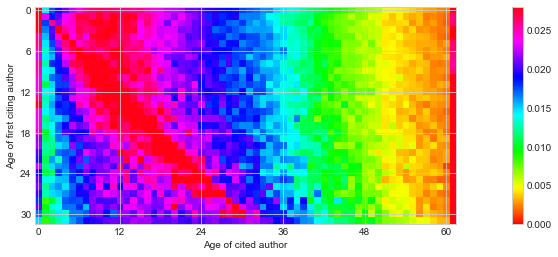

In [172]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    includeComplement=True,
    taage=range(0,61), 
    ffaage=range(0,31),
    norm='ffaage'
)
plt.clim(0,0.028)
plt.xlabel("Age of cited author")

plt.ylabel("Age of first citing author")
db.save_figure('age-ffa-age-ta')

In [106]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    includeComplement=False,
    taage=range(0,101), 
    ffaage=range(0,91),
    norm='ffaage'
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 100 - knowknow reboot 10-2020\knowknow\utility.py:20: RuntimeWarning: invalid value encountered in true_divide
  return mat/mat.sum(axis=1)[:,None]


In [107]:
matC = viz.matrix(
    socdb, 'cits', 
    plot=False, trans=False,
    includeComplement=False,
    taage=range(0,101), 
    ffaage=range(0,91)
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

In [108]:
mat.shape

(91, 101)

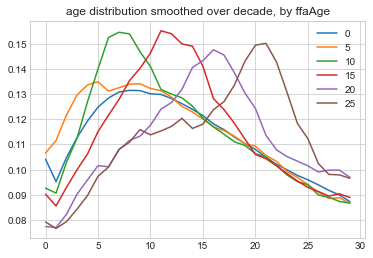

In [109]:
for AGE in [0,5,10,15,20,25]:
    plt.plot( [ mat[AGE,i:i+5].sum() for i in range(0,30) ], label=AGE )
plt.legend();
plt.title('age distribution smoothed over decade, by ffaAge');

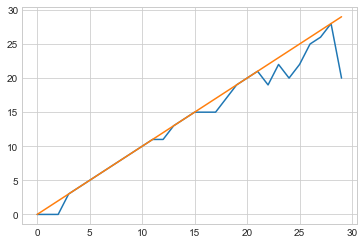

In [110]:
plt.plot([
    np.argmax(mat[AGE,:])
    for AGE in range(30)
])
plt.plot(
    range(30),
    range(30)
)

In [111]:
AGE

25

In [112]:
matC.shape

(91, 101)

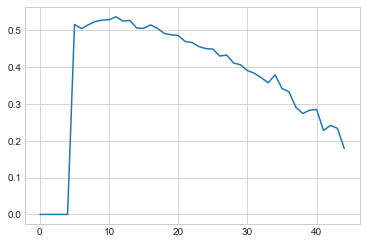

In [113]:
plt.plot([
    matC[AGE,AGE-10:AGE+10+1].sum() / matC[AGE,:].sum()
    for AGE in range(5,50)
]);

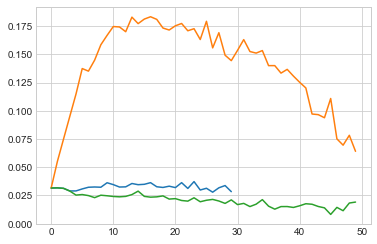

In [114]:
plt.plot([
    np.max(mat[AGE,:])
    for AGE in range(30)
])


plt.plot([
    matC[AGE,max(AGE-5,0):AGE+1].sum() / matC[AGE,:].sum()
    for AGE in range(50)
]);

plt.plot([
    matC[AGE,0].sum() / matC[AGE,:].sum()
    for AGE in range(50)
]);

perc_last5 = [
    matC[AGE,max(AGE-5,0):AGE+1].sum() / matC[AGE,:].sum()
    for AGE in range(30)
]

In [115]:
n1 = sum([
    matC[AGE,max(AGE-5,0):AGE+1].sum()
    for AGE in range(5,91)
]) / sum([
    matC[AGE,:].sum()
    for AGE in range(5,91)
])

In [116]:
n2 = sum([
    matC[AGE,AGE+1:AGE+6].sum()
    for AGE in range(0,91-5)
]) / sum([
    matC[AGE,:].sum()
    for AGE in range(0,91-5)
])

In [118]:
F_AGE = -15
T_AGE = -10

n3 = sum([
    matC[AGE,AGE+F_AGE:AGE+1+T_AGE].sum()
    for AGE in range(max(0,-F_AGE),min(91,91+T_AGE))
]) / sum([
    matC[AGE,:].sum()
    for AGE in range(max(0,-F_AGE),min(91,91+T_AGE))
])

Text(0, 0.5, 'modal cited author age groups')

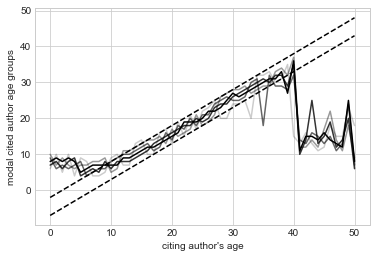

In [119]:
# which 5year cohort does each age prefer?
for i in range(1,6):
    plt.plot([
        np.argsort( [matC[AGE, i:i+6].sum() for i in range(0,51)] )[-i]
        for AGE in range(0,51)
    ],label=i,color='black',alpha=1-i*0.2+0.2)
    
plt.plot(range(0,51),range(-2,49),color='black',linestyle='--')
plt.plot(range(0,51),range(0-7,51-7),color='black',linestyle='--')
plt.xlabel('citing author\'s age')
plt.ylabel('modal cited author age groups')

In [120]:
a = np.array([[
    AGE - np.argsort( [matC[AGE, i:i+6].sum() for i in range(0,51)] )[-i]
    for AGE in range(15,36)
] for i in range(6)]).flatten()
ca = Counter(a)

In [121]:
sum(ca[i] for i in range(2,8)) / len(a)

0.7936507936507936

In [122]:
display(Markdown("""

""".format(**locals())))

In [123]:
ca.most_common(10)

[(4, 21),
 (5, 21),
 (3, 21),
 (6, 18),
 (2, 11),
 (7, 8),
 (-35, 1),
 (-34, 1),
 (-33, 1),
 (-32, 1)]

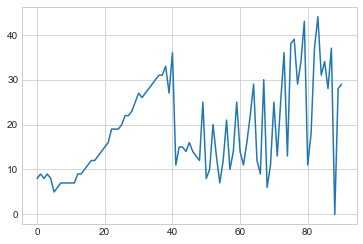

In [124]:
# which 5year cohort does each age prefer?
plt.plot([
    np.argmax( [matC[AGE, i:i+6].sum() for i in range(0,51)] )
    for AGE in range(0,91)
])

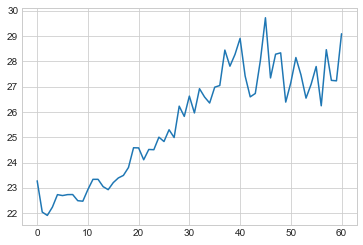

In [125]:
avg_ages = [ (mat[AGE, :] * np.arange(0,mat.shape[1],1)).sum() for AGE in range(0,61) ]
plt.plot( avg_ages )

In [126]:
mat.shape

(91, 101)

In [127]:
matC.shape

(91, 101)

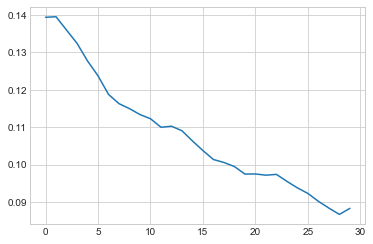

In [128]:
plt.plot([mat[i:i+6, 0:6].sum() / mat[i:i+6,:].sum() for i in range(30)])

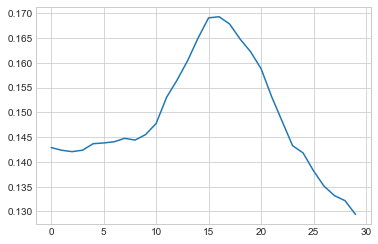

In [129]:
plt.plot([mat[i:i+6, 15:21].sum() / mat[i:i+6,:].sum() for i in range(30)])

In [143]:
mat = np.nan_to_num(mat)

In [144]:
n1 = mat[0:6, 0:6].sum() / mat[0:6,:].sum()
n2 = mat[0:6, 20:26].sum() / mat[0:6,:].sum()
n2a = mat[0:6, 45:].sum() / mat[0:6,:].sum()

n3 = mat[20:26, 0:6].sum() / mat[20:26,:].sum()
n4 = mat[20:26, 20:26].sum() / mat[20:26,:].sum()
n4a = mat[20:26, 45:].sum() / mat[20:26,:].sum()

n8a = mat[45:, 0:6].sum() / mat[45:,:].sum()
n8b = mat[45:, 20:26].sum() / mat[45:,:].sum()
n8c = mat[45:, 45:].sum() / mat[45:,:].sum()

In [145]:
n5 = sum( matC[AGE,AGE-7:AGE-2].sum() for AGE in range(15,36) ) / sum( matC[AGE,:].sum() for AGE in range(15,36) )

In [146]:
#If we define a last category, the elderly, for authors aged 45+ we can see the trend continues.
display(Markdown("""

Despite this, there is a weak but unmistakable association between citing author's age and the age distribution of the *authors* in their bibliographies,
    an association which was not present whatsoever in the age distributions of cited *works*.
We can see this by comparing three age categories of citing authors -
    aged 0-5 (adolescents), 20-25 (adults), and 45+ (elderly) -
    in how often they cite adolescent, adult, and elderly cited authors.
{n1:0.0%} of adolescents' citations go to adolescent authors, {n2:0.0%} to adult authors, and {n2a:0.0%} to elderly authors.
{n3:0.0%} of adults' citations go to adolescent authors, {n4:0.0%} to adult authors, and {n4a:0.0%} to the elderly authors.
{n8a:0.0%} of the elderly's citations go to adolescent authors, {n8b:0.0%} to adult authors, and {n8c:0.0%} to the elderly authors.

In addition, the modal cited author age increases linearly with the age of the citing author.
Authors between 15 and 35 give the most preference to works 2-7 years younger than they 
    (compared to other single age categories),
    although together these 2-7 year old cited authors 
    still only account for {n5:0.0%} of 15-35 year olds' total citations.
That is, authors have the strongest preference for citing works which were first cited 2-7 years after the author’s first paper in this dataset. But these preferences are not very strong in the first place.
""".format(**locals())))



Despite this, there is a weak but unmistakable association between citing author's age and the age distribution of the *authors* in their bibliographies,
    an association which was not present whatsoever in the age distributions of cited *works*.
We can see this by comparing three age categories of citing authors -
    aged 0-5 (adolescents), 20-25 (adults), and 45+ (elderly) -
    in how often they cite adolescent, adult, and elderly cited authors.
14% of adolescents' citations go to adolescent authors, 13% to adult authors, and 10% to elderly authors.
10% of adults' citations go to adolescent authors, 16% to adult authors, and 11% to the elderly authors.
6% of the elderly's citations go to adolescent authors, 11% to adult authors, and 19% to the elderly authors.

In addition, the modal cited author age increases linearly with the age of the citing author.
Authors between 15 and 35 give the most preference to works 2-7 years younger than they 
    (compared to other single age categories),
    although together these 2-7 year old cited authors 
    still only account for 13% of 15-35 year olds' total citations.
That is, authors have the strongest preference for citing works which were first cited 2-7 years after the author’s first paper in this dataset. But these preferences are not very strong in the first place.


''

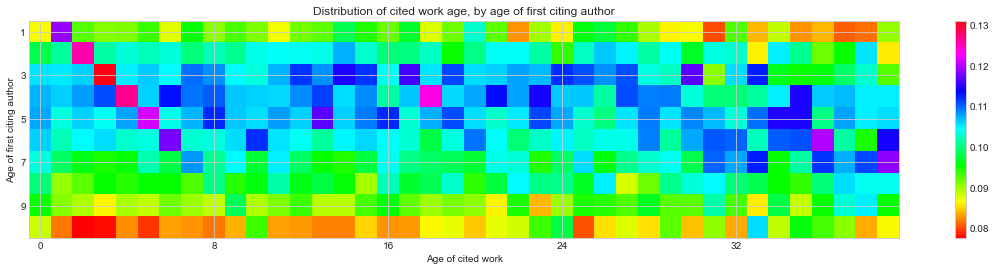

In [173]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    cAge=range(1,11), 
    ffaage=range(0,40),
    norm='ffaage'
)
plt.xlabel("Age of cited work")
plt.ylabel("Age of first citing author")
plt.title("Distribution of cited work age, by age of first citing author")
;

# older

# from author to author

+ always more likely to cite authors the same age as them
+ more timid to cite works 

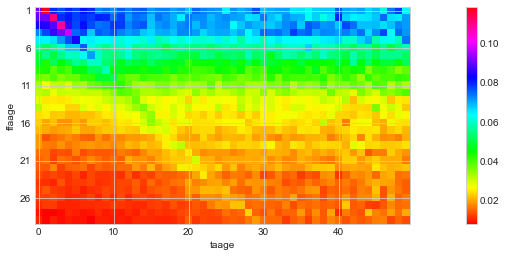

In [174]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    taage=range(0,50), 
    ffaage=range(1,30),
    norm='taage'
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

The majority of citations are two works between 5 and 15 years of age in this context ({c1:.0%}). This masks underlying heterogeneity arising from the age of citing author. Older citing authors tend to cite older authors.

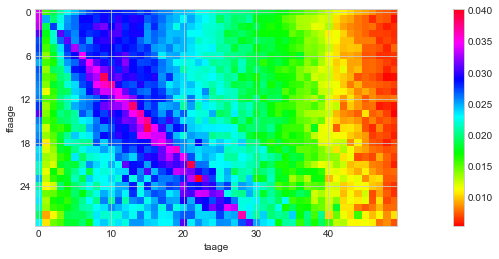

In [175]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    taage=range(0,50), 
    ffaage=range(0,30),
    norm='ffaage'
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

loading variable sociology-wos-74b/ind ___ cage.ffaage from disk


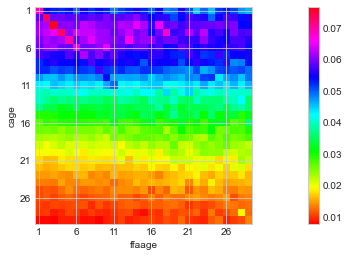

In [176]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    cage=range(1,30), 
    ffaage=range(1,30),
    norm='ffaage'
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

In [177]:
mat = viz.matrix(
    socdb, 'cits', 
    #plot=True, trans=False,
    taage=range(0,50), 
    ffaage=range(1,30),
    norm='ffaage'
)
#plt.xlabel("Age of citing author")
#plt.ylabel("Age of cited work")

In [178]:
from mpl_toolkits.mplot3d import axes3d


In [179]:
from mpl_toolkits.mplot3d import proj3d
def orthogonal_proj(zfront, zback):
    a = (zfront+zback)/(zfront-zback)
    b = -2*(zfront*zback)/(zfront-zback)
    return np.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,a,b],
                        [0,0,0,zback]])
proj3d.persp_transformation = orthogonal_proj

In [180]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

conf = widgets.IntSlider(min=-360,max=360,step=10,value=0)
conf2 = widgets.IntSlider(min=-360,max=360,step=10,value=0)


X,Y = np.meshgrid(
    np.arange(0,mat.shape[0]),
    np.arange(0,mat.shape[1])
)


def g(a1,a2):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    cset = ax.contour(X, Y, mat.T, zdir='z', offset=0, cmap=plt.cm.coolwarm)
    ax.plot_surface(X,Y,mat.T,alpha=1, cmap=plt.cm.ocean)


    # rotate the axes and update
    ax.view_init(elev=a1,azim=a2)
    ax.set_zlim(0,0.04)
    
interact(g, a1=conf, a2=conf2);

interactive(children=(IntSlider(value=0, description='a1', max=360, min=-360, step=10), IntSlider(value=0, des…

# age distributions by year

loading variable sociology-wos-74b/doc ___ cAge.fy from disk


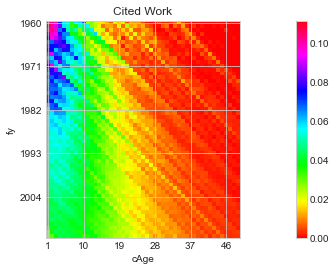

In [181]:
mat = viz.matrix(
    socdb, 'docs', 
    plot=True, trans=True,
    norm='fy',
    cAge=range(1,50), 
    fy=range(1960,2015)
)
plt.title('Cited Work');

In [182]:
mat

In [183]:
mat = viz.matrix(
    socdb, 'docs', 
    #plot=True, trans=True,
    norm='fy',
    cAge=range(1,50), 
    fy=range(1990,2015)
)

In [184]:
help(imresize)

NameError: name 'imresize' is not defined

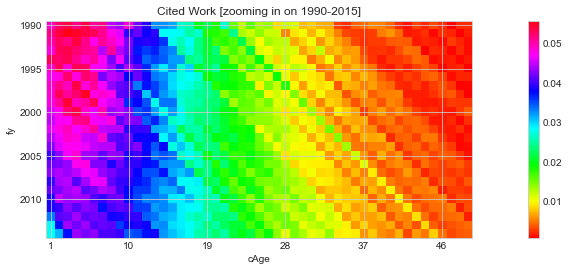

In [185]:
mat = viz.matrix(
    socdb, 'docs', 
    plot=True, trans=True,
    norm='fy',
    cAge=range(1,50), 
    fy=range(1990,2015)
)
plt.title('Cited Work [zooming in on 1990-2015]');

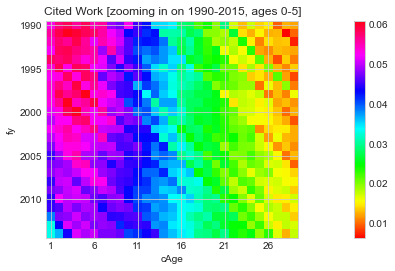

In [186]:
mat = viz.matrix(
    socdb, 'docs', 
    plot=True, trans=True,
    norm='fy',
    cAge=range(1,30), 
    fy=range(1990,2015)
)
plt.title('Cited Work [zooming in on 1990-2015, ages 0-5]');

loading variable sociology-wos-74b/doc ___ fy.taage from disk


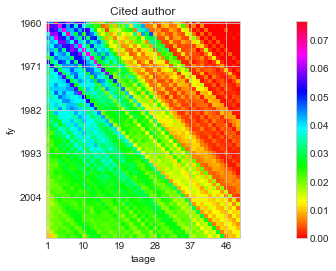

In [187]:
mat = viz.matrix(
    socdb, 'docs', 
    plot=True, trans=False,
    norm='fy',
    taage=range(1,50), 
    fy=range(1960,2015)
)
plt.title('Cited author');

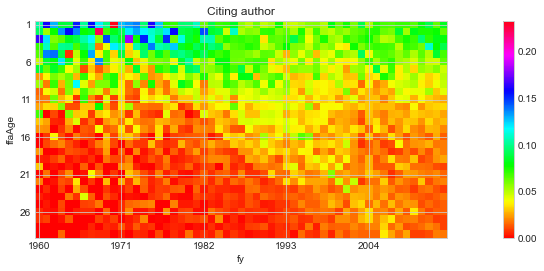

In [188]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    norm='fy',
    ffaAge=range(1,30), 
    fy=range(1960,2015)
)
plt.title('Citing author');

# citation and document counts by age category

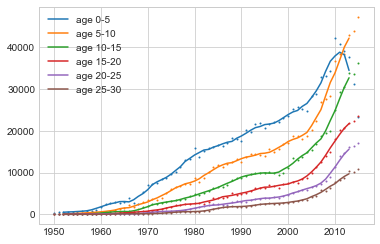

In [191]:
mat = viz.matrix(
    db, 'cits', 
    plot=False, trans=False,
    norm=None,
    cage=range(0,41), 
    fy=range(1950,2016), includeComplement=True
)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

import matplotlib.pyplot as plt
from itertools import cycle

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])


years = list(range(1950,2016))
for a in range(0,30,5):
    my_a = mat[a:a+5,:-1].sum(axis=0)
    my_a_rolling = moving_average(my_a, 5)
    c = next(colors)
    plt.plot(years[2:-2],my_a_rolling, label='age %s-%s'%(a,a+5),color=c)
    plt.scatter(years, my_a,color=c, s=1)
plt.legend()
plt.title('')
plt.show()

loading variable sociology-wos-74b/ind ___ fy.taage from disk


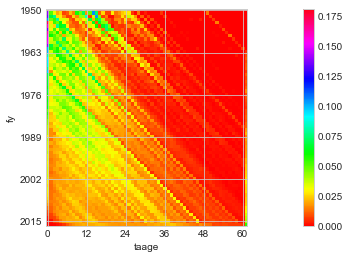

In [192]:
mat = viz.matrix(
    socdb, 'cits', 
    plot=True, trans=False,
    includeComplement=True,
    taage=range(0,61), 
    fy=years,
    norm='fy'
)

In [202]:
"""
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

import matplotlib.pyplot as plt
from itertools import cycle

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])


years = list(range(1950,2016))
for a in range(0,30,5):
    my_a = mat[a:a+5,:-1].sum(axis=0)
    my_a_rolling = moving_average(my_a, 5)
    c = next(colors)
    plt.plot(years[2:-2],my_a_rolling, label='age %s-%s'%(a,a+5),color=c)
    plt.scatter(years, my_a,color=c, s=1)
plt.legend()
plt.show()
""";

In [197]:
def plot_from(todos, typ='cits'):
    global plt

    for what, what_name, trans, ages, plus in todos:

        plt.figure(figsize=(10,5))

        years = list(range(1930,2016))

        kwargs = {
            "plot": False, 
            "trans": trans,
            "norm": None,
            "fy": years, 
            "includeComplement": True,
            what: range(0,81)
        }

        mat = viz.matrix(
            socdb, typ, 
            **kwargs
        )

        def moving_average(x, w):
            return np.convolve(x, np.ones(w), 'valid') / w

        import matplotlib.pyplot as plt
        from itertools import cycle

        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = cycle(prop_cycle.by_key()['color'])

        for ai, a in enumerate(ages[:-1]):
            nexta = ages[ai+1]

            if nexta-a == 1:
                my_a = mat[a,:-1]
                lab = 'age %s' % a
            else:
                my_a = mat[a:nexta,:-1].sum(axis=0)
                lab = 'age %s-%s'%(a,nexta)

            my_a_rolling = moving_average(my_a, 5)
            c = next(colors)
            plt.plot(years[2:-2],my_a_rolling, label=lab,color=c)
            plt.scatter(years, my_a,color=c, s=1)

        if plus:
            # the rest
            my_a = mat[ages[-1]:,:-1].sum(axis=0)
            my_a_rolling = moving_average(my_a, 5)
            c = next(colors)
            #plt.plot(years[2:-2],my_a_rolling, label='age %s+'%(ages[-1]),color=c)
            #plt.scatter(years, my_a,color=c, s=1)
            plt.fill_between(years[2:-2],my_a_rolling, label='age %s+'%(ages[-1]),color='gray',alpha=0.2)

        plt.legend()
        print("%s" % what_name)

loading variable sociology-wos-74b/doc ___ ffaage.fy from disk
Number of documents by citing author age
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


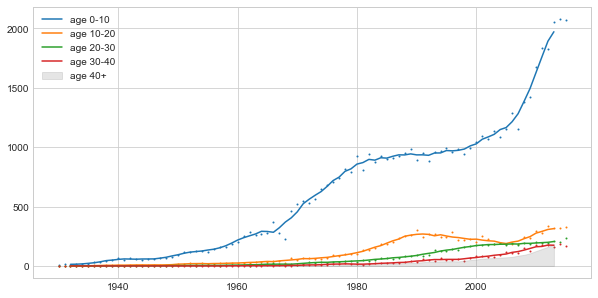

In [198]:
todos = [
    #('cage', 'Number of citations by cited work age', False, [0,1,5,10,15,20], True),
    #('cage', 'Number of citations by cited work age', False, [0,5,15,30,50], True),
    #('taage', 'Number of citations by cited author age', True, [0,1,5,10,20,40,60], False),
    #('faage', 'Number of documents by citing author age', False, [0,1,5,10,25,30], False),
    ('ffaage', 'Number of documents by citing author age', False, [0,10,20,30,40], True),
]

plot_from(todos, 'docs')
socdb.save_figure('fa by age')
plt.show()

Number of citations by cited author age
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


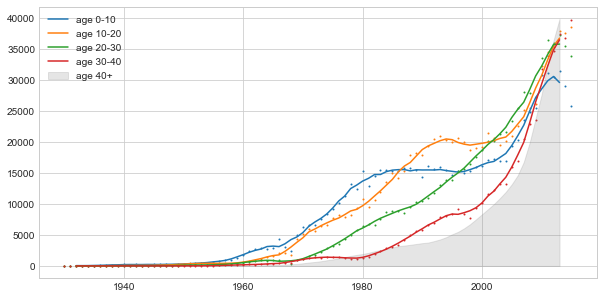

In [199]:
todos = [
    #('cage', 'Number of citations by cited work age', False, [0,1,5,10,15,20], True),
    #('cage', 'Number of citations by cited work age', False, [0,5,15,30,50], True),
    ('taage', 'Number of citations by cited author age', True, [0,10,20,30,40], True),
    #('faage', 'Number of documents by citing author age', False, [0,1,5,10,25,30], False),
    #('faage', 'Number of documents by citing author age', False, [1,5,10,15,20,25,30], True),
]

plot_from(todos,'cits')
socdb.save_figure('ta by age')
plt.show()

Number of citations by cited work age
Saving to 'G:\My Drive\2020 ORGANISATION\1. PROJECTS\qualitative analysis of literature\110 CITATION ANALYSIS\010 analyses\bundle 101 - citation deaths reboot 10-2020\figures'


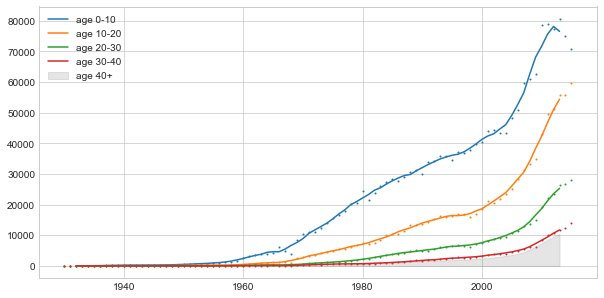

In [203]:
todos = [
    ('cage', 'Number of citations by cited work age', False, [0,10,20,30,40], True),
    #('cage', 'Number of citations by cited work age', False, [0,5,10,15,20], True),
    #('taage', 'Number of citations by cited author age', True, [0,10,20,30,40,50], True),
    #('faage', 'Number of documents by citing author age', False, [0,1,5,10,25,30], False),
    #('faage', 'Number of documents by citing author age', False, [1,5,10,15,20,25,30], True),
]

plot_from(todos,'cits')
socdb.save_figure('c by age')
plt.show()

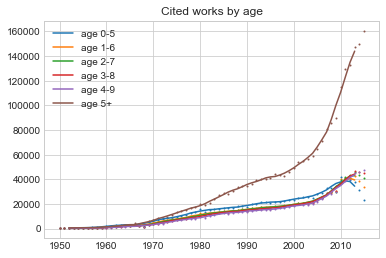

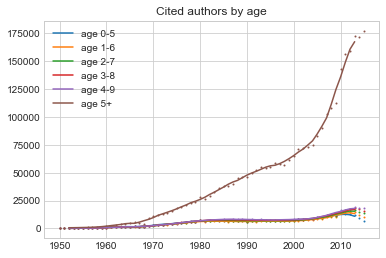

loading variable sociology-wos-74b/ind ___ faage.fy from disk


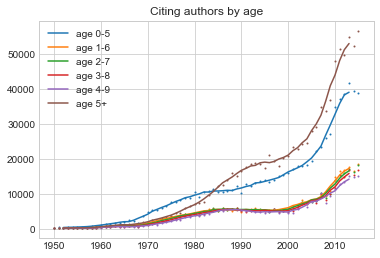

In [204]:
todos = [
    ('cage', 'Cited works', False, list(range(0,6,1))),
    ('taage', 'Cited authors', True, list(range(0,6,1))),
    ('faage', 'Citing authors', False, list(range(0,6,1))),
]

for what, what_name, trans, ages in todos:
    
    years = list(range(1950,2016))

    kwargs = {
        "plot": False, 
        "trans": trans,
        "norm": None,
        "fy": years, 
        "includeComplement": True,
        what: range(0,41)
    }

    mat = viz.matrix(
        socdb, 'cits', 
        **kwargs
    )

    def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w

    import matplotlib.pyplot as plt
    from itertools import cycle

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle(prop_cycle.by_key()['color'])


    for a in ages[:-1]:
        my_a = mat[a:a+5,:-1].sum(axis=0)
        my_a_rolling = moving_average(my_a, 5)
        c = next(colors)
        plt.plot(years[2:-2],my_a_rolling, label='age %s-%s'%(a,a+5),color=c)
        plt.scatter(years, my_a,color=c, s=1)
        
    # the rest
    my_a = mat[ages[-1]:,:-1].sum(axis=0)
    my_a_rolling = moving_average(my_a, 5)
    c = next(colors)
    plt.plot(years[2:-2],my_a_rolling, label='age %s+'%(ages[-1]),color=c)
    plt.scatter(years, my_a,color=c, s=1)

    plt.legend()
    plt.title("%s by age" % what_name)
    plt.show()

# absolute size by age category

In [206]:
#cc = db.by('c','cAge','fy').cits

this actually isn't possible..... shih

In [ ]:
"""
years = range(1950,2016)
distinct = defaultdict(set)
age_ranges = [
    (0,5),
    (5,10),
    (10,15),
    (15,20),
    (20,25)
]
for (c,fy),COUNT in cc.items():
    if COUNT == 0:
        continue
        
    for As, Ae in age_ranges:
        if As <= fy < Ae:
            distinct[(YY,(As,Ae))].add(c) 
"""